In [2]:
import math
import colorsys
import pandas as pd
import random
import time

from random import randint
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from datetime import datetime

from scipy.interpolate import interp1d


Average Error between interpolated spline and original data: 0.8074379696606484


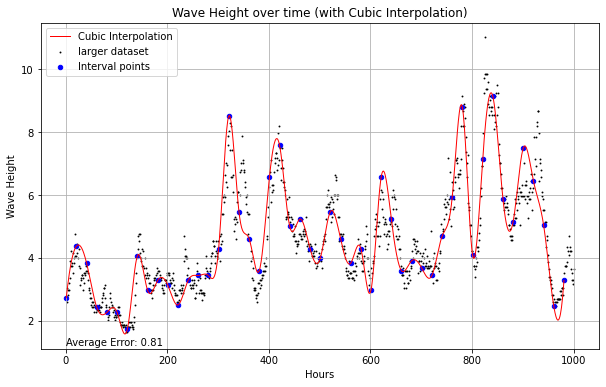

Elapsed time: 0:00:00.352951 seconds


In [3]:
# Spline Method of Interpolation

# For noting time taken
start_time = datetime.now()

df = pd.read_csv("FYPWaveData.csv", skiprows = [1],parse_dates=['time'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%dT%H:%M:%SZ'))

# In this case the column names are 'time' and 'WaveHeight', can replace where necessary
#Specifically we are taking Wave height, substitute in 'WindSpeed' for windspeed interpolation
time = df['time']
wave_height = df['WaveHeight'].astype(float)
length = len(time)
hours = pd.DataFrame({'index': range(1, length+1)})
df = pd.DataFrame({'x': range(1, len(wave_height) + 1), 'y': wave_height})

# Defining an endpoint to allow a selected time interval
end_index = 1000  # because dataset massive

# Subset the DataFrame up to the end index
df_subset = df.iloc[:end_index]

step = 20  # Set your desired step size here, we will interpolate through 50 points 

# Subsetting the data selected for future comparisons
df_subset_n = df_subset.iloc[::step]


x = df_subset_n['x'].tolist()
y = df_subset_n['y'].tolist()

#For he error
hours2 = hours.iloc[:end_index]
wave_height2 = wave_height.iloc[:end_index]

# Perform cubic interpolation
f = interp1d(x, y, kind='cubic')

# Generate new wind speed values for interpolation
hours_interp = np.linspace(min(x), max(x), 1000)

# Interpolate wave height values
wave_height_interp = f(hours_interp)

# Calculate the error
error = wave_height2 - wave_height_interp
average_error = np.mean(np.abs(error))  # Taking absolute values to avoid cancellation of positive and negative errors

# Print or use the error as needed
print("Average Error between interpolated spline and original data:", average_error)

# Plot the original data and interpolated curve
plt.figure(figsize=(10, 6))
plt.scatter(hours2, wave_height2, s=.8, c = "black", label='larger dataset')
plt.scatter(x,y, marker = "o", c = "blue", s=20, label='Interval points')

plt.plot(hours_interp, wave_height_interp,linewidth = 1, color='red',label='Cubic Interpolation')
plt.xlabel('Hours')
plt.ylabel('Wave Height')
plt.title('Wave Height over time (with Cubic Interpolation)')
plt.legend()
plt.grid(True)
plt.text(0.6, 01.2, f'Average Error: {average_error:.2f}', fontsize=10, color='black')

plt.show()

end_time = datetime.now()
# Calculate elapsed time
elapsed_time = end_time - start_time

print(f"Elapsed time: {elapsed_time} seconds")




Average Error in Y direction: 4.260792045967617
Elapsed time: 0:00:00.257933 seconds


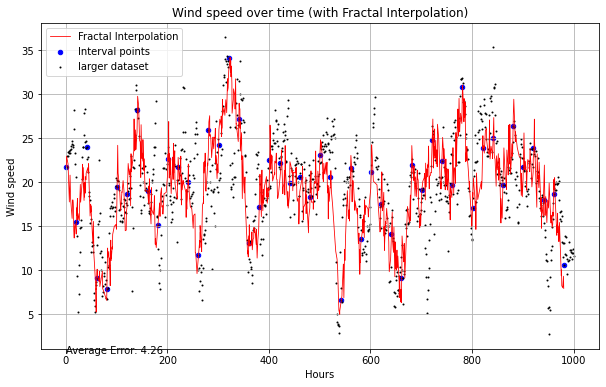

In [6]:
#Fractal Interpolation Function Approach

start_time = datetime.now()

df = pd.read_csv("FYPWaveData.csv", skiprows = [1],parse_dates=['time'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%dT%H:%M:%SZ'))

# Assuming the column names are 'time' and 'Windspeed'
time = df['time']
wind_speed = df['WindSpeed'].astype(float)
length = len(time)
hours = pd.DataFrame({'index': range(1, length+1)})
#print(hours)
df = pd.DataFrame({'x': range(1, len(wind_speed) + 1), 'y': wind_speed})
#print(df)

# Define your end index based on some condition
end_index = 1000  # because dataset massive

# Subset the DataFrame up to the end index
df_subset = df.iloc[:end_index]

step = 20  # Set your desired step size here

# Subset the subset by keeping every nth value
df_subset_n = df_subset.iloc[::step]

x = df_subset_n['x'].tolist()
y = df_subset_n['y'].tolist()
#for reproducibility
random.seed(1)

#for the scatter
hours2 = hours.iloc[:end_index]
wind_speed2 = wind_speed.iloc[:end_index]


p = len(x)
start_point = (x[0], y[0])
X = [start_point[0]]
Y = [start_point[1]]

## Select a desirec Vertical Scaling Factor ( This was denoted by lambda in the report) 
d = []
d = [-0.3] * ( len(x))

b = x[-1] - x[0]
a = []; c= []; e = []; ff = [] #ff was denoted by g in the report
#These are the linear equations as defined by Michael Barnsley
for n in range(1,p):
    aN = (x[n] - x[n-1])/b
    cN = ((y[n] - y[n-1])/b) - d[n]*((y[-1] - y[0])/b)
    eN = ((x[-1]*x[n-1])-(x[0]*x[n]))/b
    ffN = (x[-1]*y[n-1] - x[0]*y[n])/b - d[n]*((x[-1]*y[0] - x[0]*y[-1])/b)

    a.append(aN)
    c.append(cN)
    e.append(eN)
    ff.append(ffN)
#randomly selcting the points
for n in range(1,1000):
    k = random.randint(0,p-2)
    newX = a[k]*X[n-1] + e[k]
    newY = c[k]*X[n-1] +d[k+1]*Y[n-1] + ff[k]
    
    X.append(newX); Y.append(newY)

df = pd.DataFrame({"x": X,"y": Y})
#print(df)
df = df.sort_values(by = "x")
X1 =df.iloc[:,0].values
Y1 = df.iloc[:,1].values
# Calculate the error between generated points and original data points

error_y = wind_speed2 - Y1
# Calculate the average error in x and y directions
average_error_y = np.mean(np.abs(error_y))
# Print or use the error as needed
print("Average Error in Y direction:", average_error_y)
#Note with the current approach taken for error, the length of the dataset foir the scatter plot must match the amount of points 
#randomly generated for the fractal interpolation function
plt.figure(figsize=(10, 6))

plt.plot(X1,Y1, linewidth = .8, color='red',label='Fractal Interpolation')

plt.scatter(x,y, marker = "o", c = "blue", s=20, label='Interval points')
#and without the step
plt.scatter(hours2, wind_speed2, s=1, c = "black", label='larger dataset')
plt.legend()
plt.xlabel('Hours')
plt.ylabel('Wind speed')
plt.title('Wind speed over time (with Fractal Interpolation)')
plt.legend()
plt.grid(True)

plt.show
plt.savefig('interpolant.pdf')
plt.text(0.5, 0.5, f'Average Error: {average_error_y:.2f}', fontsize=10, color='black')


end_time = datetime.now()
# Calculate elapsed time
elapsed_time = end_time - start_time

print(f"Elapsed time: {elapsed_time} seconds")


In [ ]:
start_time = datetime.now()
#changed dataset name and the fomrat of datetime to '%d/%m/%Y %H:%M'. Used column name WS for windspeed
df = pd.read_csv("nuigdata.csv", skiprows = [1],parse_dates=['time'], date_parser=lambda x: pd.to_datetime(x, format='%d/%m/%Y %H:%M'))

# Assuming the column names are 'time' and 'WS'
#had to name the time column in excel because it did not have a name
time = df['time']
wind_speed = df['WS'].astype(float)
length = len(time)
hours = pd.DataFrame({'index': range(1, length+1)})
df = pd.DataFrame({'x': range(1, len(wind_speed) + 1), 'y': wind_speed})

# Define your end index based on some condition
end_index = 1000  # because dataset massive

# Subset the DataFrame up to the end index
df_subset = df.iloc[:end_index]

step = 20  # Set your desired step size here

# Subset the subset by keeping every nth value
df_subset_n = df_subset.iloc[::step]

x = df_subset_n['x'].tolist()
y = df_subset_n['y'].tolist()

random.seed(1)

#for the scatter
hours2 = hours.iloc[:end_index]
wind_speed2 = wind_speed.iloc[:end_index]

p = len(x)

X = [0]; Y=[0]

## vertical scaling factor
d = [-.05] * len(x)

b = x[-1] - x[0]
a = []; c= []; e = []; ff = []

for n in range(1,p):
    aN = (x[n] - x[n-1])/b
    cN = ((y[n] - y[n-1])/b) - d[n]*((y[-1] - y[0])/b)
    eN = ((x[-1]*x[n-1])-(x[0]*x[n]))/b
    ffN = (x[-1]*y[n-1] - x[0]*y[n])/b - d[n]*((x[-1]*y[0] - x[0]*y[-1])/b)

    a.append(aN)
    c.append(cN)
    e.append(eN)
    ff.append(ffN)


for n in range(1,1000):
    k = random.randint(0,p-2)
    newX = a[k]*X[n-1] + e[k]
    newY = c[k]*X[n-1] +d[k+1]*Y[n-1] + ff[k]
    
    X.append(newX); Y.append(newY)


df = pd.DataFrame({"x": X,"y": Y})
#print(df)
df = df.sort_values(by = "x")
X1 =df.iloc[:,0].values
Y1 = df.iloc[:,1].values

# Calculate the error between generated points and original data points

error_y = wind_speed2 - Y1
# Calculate the average error in x and y directions
average_error_y = np.mean(np.abs(error_y))

# Calculate the overall average error

# Print or use the error as needed
print("Average Error in Y direction:", average_error_y)

plt.figure(figsize=(10, 6))

plt.plot(X1,Y1, linewidth = .8, color='red',label='Fractal Interpolation')

plt.scatter(x,y, marker = "o", c = "blue", s=20, label='Interval points')
#and without the step
plt.scatter(hours2, wind_speed2, s=1, c = "black", label='larger dataset')
plt.legend()
plt.xlabel('Hours')
plt.ylabel('Wind speed in m/s')
plt.title('Wind speed over time (with Fractal Interpolation)')
plt.legend()
plt.grid(True)

plt.show
plt.savefig('interpolant.pdf')
plt.text(0.5, 0.5, f'Average Error: {average_error_y:.2f}', fontsize=10, color='black')


end_time = datetime.now()
# Calculate elapsed time
elapsed_time = end_time - start_time

print(f"Elapsed time: {elapsed_time} seconds")
